# EDA to Prediction (DieTianic)
- Îç∞Ïù¥ÌÑ∞: [KaggleÏùò Titanic](https://www.kaggle.com/c/titanic)
- ÌïÑÏÇ¨ Ï∞∏Ï°∞: [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

<br/>

**idea how is the workflow in any predictive modeling problem**
- Î™®Îç∏ÎßÅÏóê Îçî Ï¥àÏ†êÏùÑ ÎßûÏ∂ò Ïª§ÎÑê

1. EDA
2. Feature Engineering & Data Cleaning
3. Predictive Modeling

***

## 1. EDA (Exploratory Data Analysis)

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data = pd.read_csv('./data/train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> `Age`, `Cabin`, `Embarked`

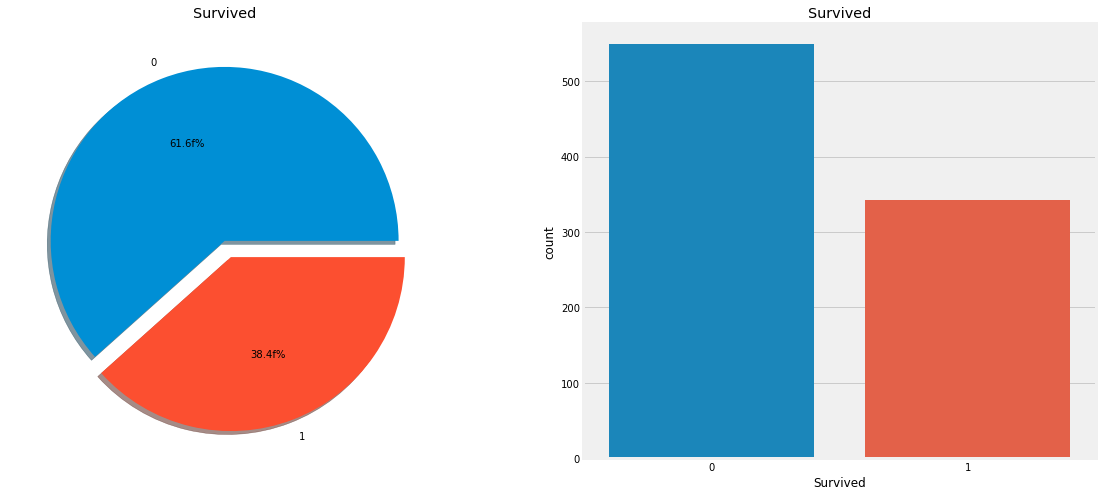

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1ff%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

> ÏÉùÏ°¥ o: 38.41% -> ÍΩ§ÎÇò `balanced data`
> - Í∞Å featureÏóê Îî∞Î•∏ ÏÉùÏ°¥Î•†ÏùÑ ÌôïÏù∏ÌïòÍ∏∞ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÎ∂ÄÌÑ∞ Ïù¥Ìï¥ÌïòÍ∏∞

In [10]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 2. Types of Features
#### Categorical Features
- Sex, Embarked

#### Ordinal Features
- Pclass

#### Continous Feature
- Age

### 1.1 Analysing the Features
### Sex (Categorical)

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

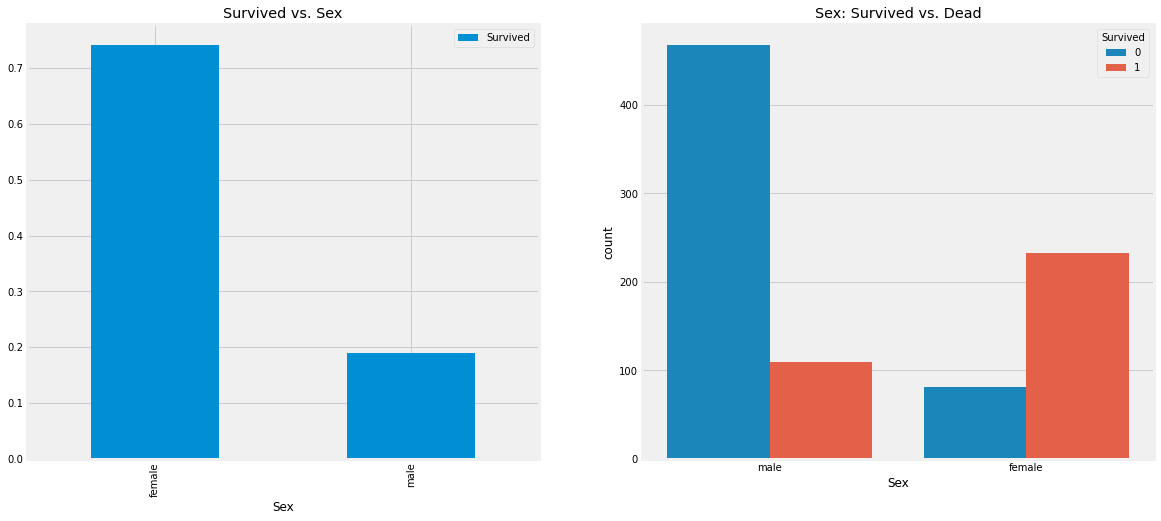

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

> - Ïó¨ÏûêÏùò ÏÉùÏ°¥Î•†Ïù¥ ÍµâÏû•Ìûà ÎÜíÏùå: `Sex`ÎùºÎäî featureÏù¥ Î™®Îç∏Ïóê Ï§ëÏöîÌïú Î≥ÄÏàòÏ≤òÎüº Î≥¥Ïù∏Îã§.

### Pclass (Ordinal)

In [13]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

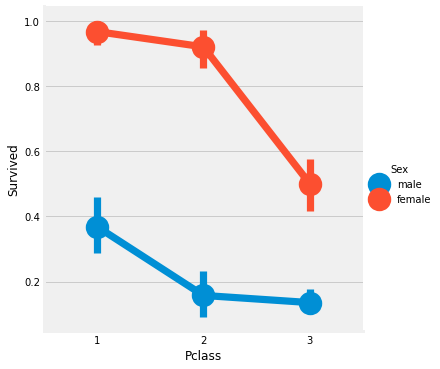

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

**FactorPlot**: Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÏâΩÍ≤å Î∂ÑÎ¶¨Ìï¥ Í∑∏Î¶¥ Ïàò ÏûàÏùå
> - Pclass1Ïùò Ïó¨ÏûêÍ∞Ä Í±∞Ïùò 95%

### Age (Continuous)

In [15]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


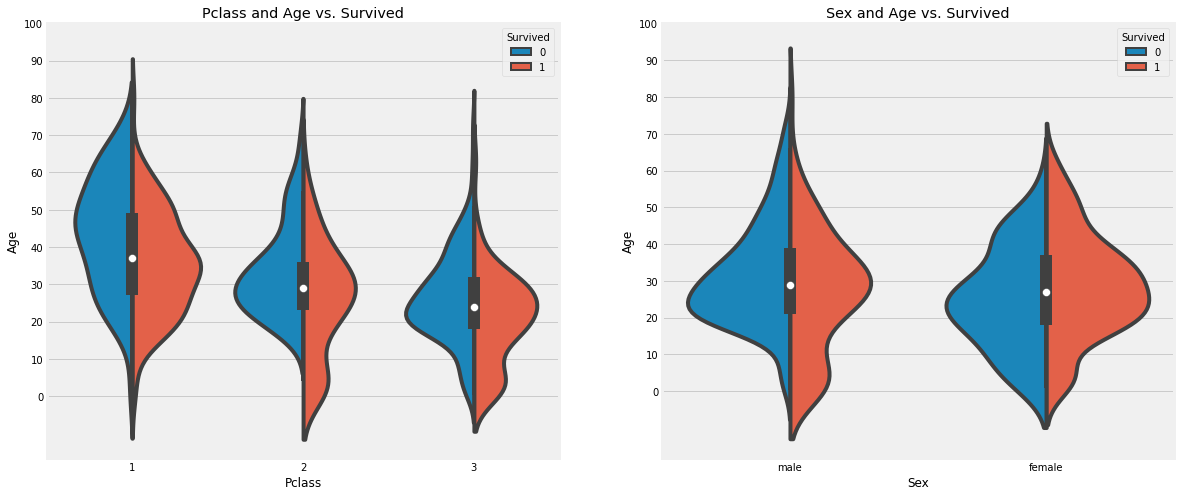

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

> - PclassÎ•º Î≥¥Î©¥ age 10 ÏïÑÎûò ÏïÑÏù¥Îì§Ïùò ÏÉùÏ°¥Î•†Ïù¥ ÍΩ§ ÎÜíÎã§.
> - Pclass 1ÏóêÏÑú Ïó¨ÏûêÏùò ÏÉùÏ°¥Î•†Ïù¥ 20-50ÏÑ∏Ïóê ÎÜíÏùå
> - ÎÇ®ÏûêÎäî ÎÇòÏù¥Í∞Ä Îì§ÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ ÎÇÆÏïÑÏßê

### Age Null Data
- NaNÏùÑ Îã®ÏàúÌûà ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõåÎ≤ÑÎ¶¨Î©¥ 4ÏÇ¥ ÏïÑÏù¥ÏôÄ 29ÏÇ¥ÏóêÍ≤å Í∞ôÏùÄ ÎÇòÏù¥Î•º Î∂ÄÏó¨Ìï®Ïù¥ ÎêòÎäîÎç∞ Ïò≥ÏßÄ ÏïäÎã§.
- `.`ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Salutations Ï∂îÏ∂úÌïòÍ∏∞

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extrcat Salutations

In [19]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Initial  
0      0         A/5 21171   7.2500   NaN        S      Mr  
1      0          PC 17599  71.2833   C85        C     Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S    Miss  
3      0            113803  53.1000  C123        S     Mrs  
4      0            373450   8.0500   NaN        S      Mr

In [20]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

> `Mlle`, `Mmme`Í≥º Í∞ôÏùÄ InitialÏùÄ Ïò§ÌÉÄÏ≤òÎüº Î≥¥Ïù∏Îã§.
> - replaceÌïòÍ∏∞

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean() # average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [23]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [24]:
data.Age.isnull().any() # no null left

False

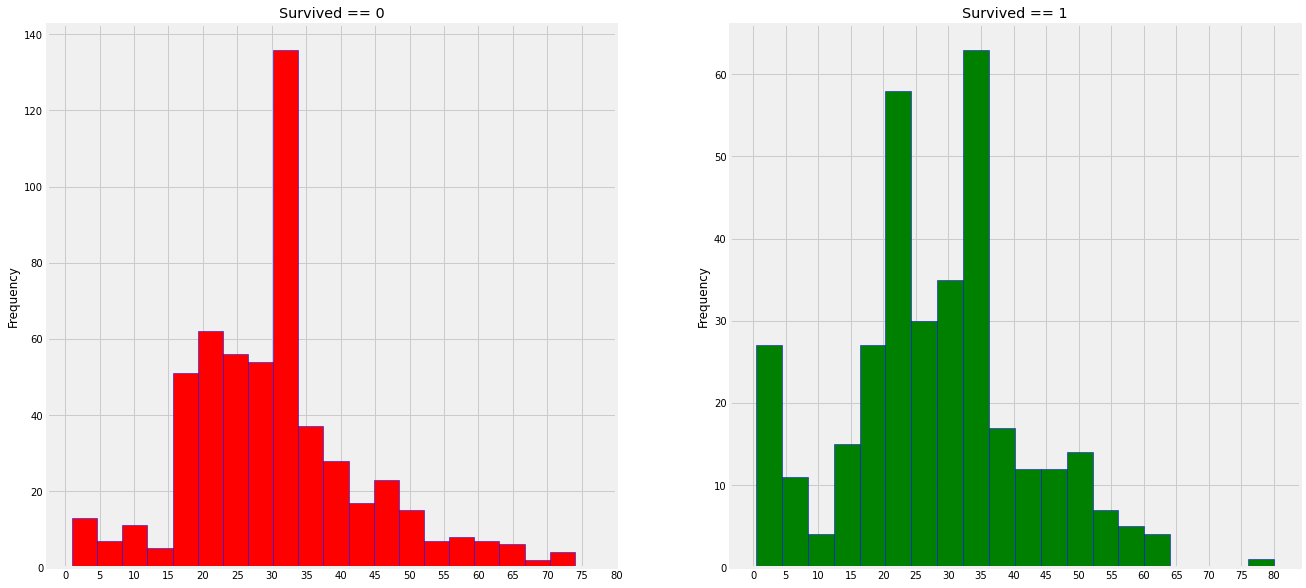

In [25]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='b', color='r')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5)) # Íµ≥Ïù¥ listÎ°ú Î¨∂Ïñ¥Ï£ºÎäî Ïù¥Ïú†Îäî?
# x1 = range(0, 85, 5)
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='b', color='g')
ax[1].set_title('Survived == 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

> - 5ÏÇ¥ Ïù¥ÌïòÏùò ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.
> - ÌÉëÏäπÏûê Ï§ë Í∞ÄÏû• Ïó∞Ïû•Ïûê(80ÏÑ∏)Îäî ÏÉùÏ°¥Ïûê
> - ÏµúÎåÄ ÏÇ¨ÎßùÏûê ÏàòÎäî 30~40ÏÑ∏Ïóê Í∞ÄÏû• ÎßéÎã§.

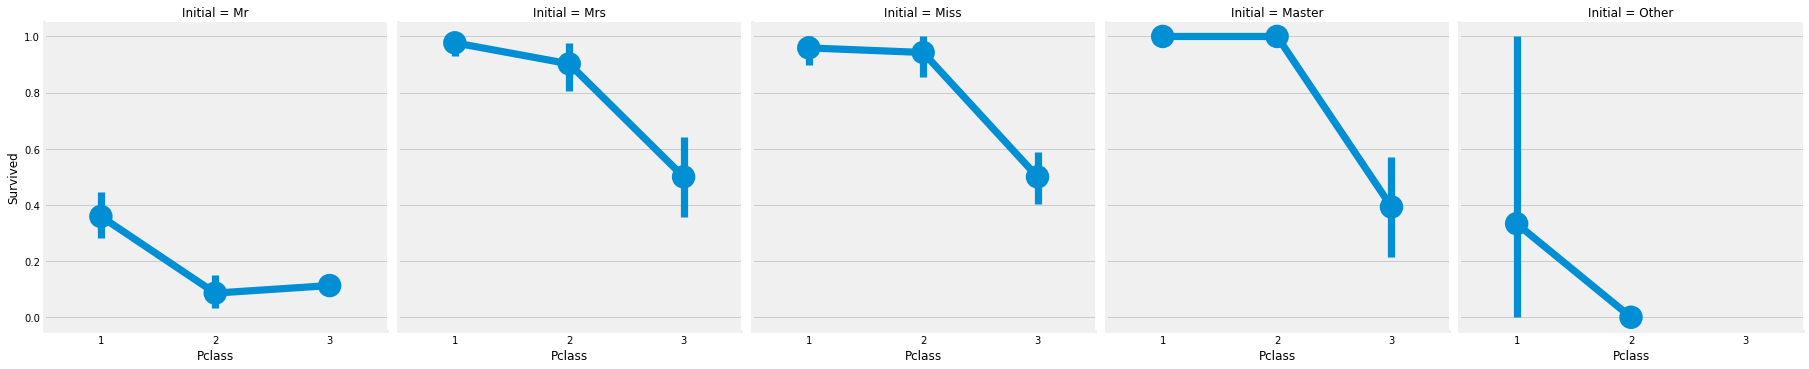

In [26]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

> - Mrs. Miss, Master(5)ÏóêÏÑú ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏùÄ Í≤ÉÏùÑ Î¥êÏÑú Ïó¨ÏûêÏôÄ ÏïÑÏù¥Ïùò ÏÉùÏ°¥Ïù¥ Ïö∞ÏÑ†ÏãúÎêúÎã§.

### Embarked (Categorical)

In [27]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

In [28]:
pd.crosstab(data['Embarked'], data['Survived']).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port of Embarkation
- `gcf()`: Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú figureÎ•º ÎåÄÏÉÅÏúºÎ°ú Î©§Î≤Ñ Ìï®Ïàò Ìò∏Ï∂úÌïòÍ∏∞

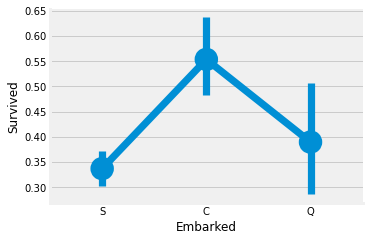

In [29]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

> `C` Ìï≠Íµ¨Ïùò ÏÉùÏ°¥Î•†Ïù¥ 0.55 Í∞ÄÎüâÏúºÎ°ú Í∞ÄÏû• ÎÜíÍ≥†, `S`Í∞Ä Í∞ÄÏû• ÎÇÆÎã§.

Text(0.5, 1.0, 'Embarked vs. Pclass')

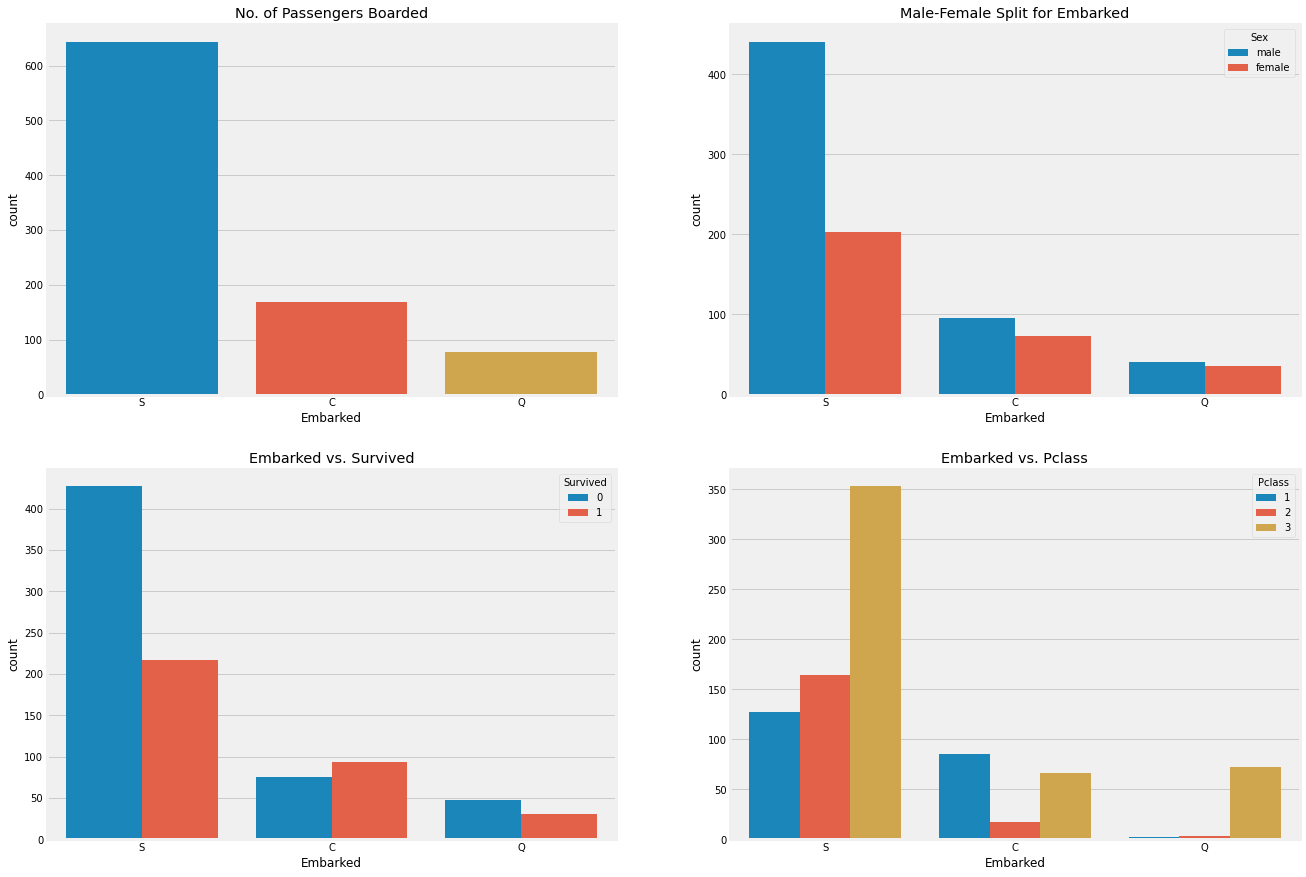

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs. Pclass')

> - Ìï≠Íµ¨ `S`Ïùò ÌÉëÏäπÏûê ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄÎç∞, ÎåÄÎ∂ÄÎ∂Ñ Pclass3 ÌÉëÏäπÏûêÎùºÍ≥† ÌåêÎã®ÎêúÎã§.
> - `C`Ïùò ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏïÑ Î≥¥Ïù∏Îã§.
> - `S` Ìï≠Íµ¨Ïùò ÏÇ¨ÎßùÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÄ Pclass3Ïùò ÎåÄÎ∂ÄÎ∂ÑÏù¥ ÏÇ¨ÎßùÌñàÍ∏∞ ÎïåÎ¨∏
> - `Q` Ìï≠Íµ¨Îäî Í±∞Ïùò ÎåÄÎ∂ÄÎ∂ÑÏù¥ Pclass3 ÌÉëÏäπÏûêÏòÄÎã§.

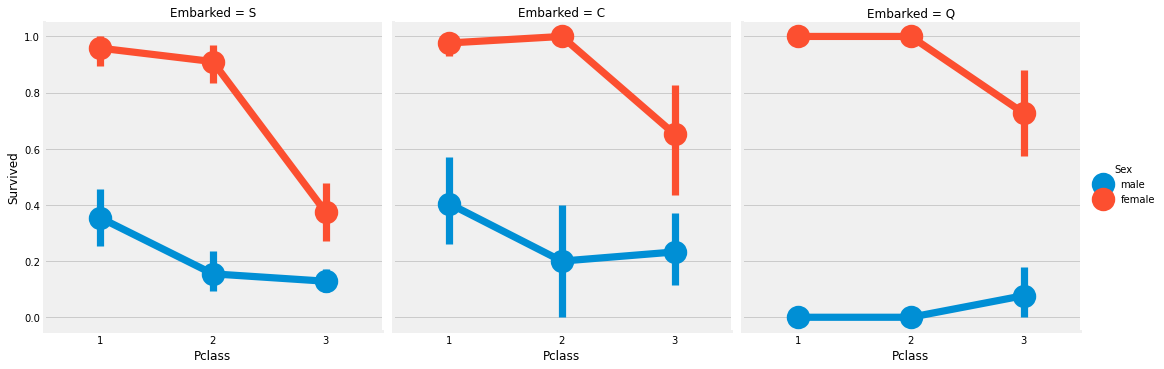

In [31]:
# PclassÎ≥Ñ ÏÇ¨ÎßùÏûêÏàò
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

> - Pclass 1, Pclass 2ÏóêÏÑú Ïó¨ÏûêÏùò ÏÉùÏ°¥Î•†ÏùÄ Í±∞Ïùò 1Ïóê Í∞ÄÍπùÎã§.
> - `S` Ìï≠Íµ¨: Pclass 3Ïùò ÏÉùÏ°¥Î•† Îß§Ïö∞ ÎÇÆÏùå - ÎèàÏùò ÏòÅÌñ•Ïù¥ ÏûàÏùÑ Í≤ÉÏù¥Îùº ÏÉùÍ∞Å
> - `Q` Ìï≠Íµ¨: ÎÇ®ÏûêÏùò ÏÉùÏ°¥Î•† Îß§Ïö∞ ÎÇÆÏùå

### Filling Embarked NaN
`S` Ìï≠Íµ¨Ïùò ÌÉëÏäπÍ∞ùÏù¥ Í∞ÄÏû• ÎÜíÏïòÍ≥†, NaN Í∞íÏù¥ ÏûàÎã§Î©¥ `S`Î°ú ÎåÄÏ≤¥ÌïòÏûê.

In [32]:
data['Embarked'].isnull().sum()

2

In [33]:
data['Embarked'].fillna('S', inplace=True)

In [34]:
data.Embarked.isnull().any() # no NaN values

False

### SibSip (Discrete)
- ÌòïÏ†ú ÏûêÎß§Í∞Ä ÏûàÎäîÏßÄ, Í∞ÄÏ°± Íµ¨ÏÑ±ÏõêÏù¥ ÏûàÎäîÏßÄ ÎÇòÌÉÄÎÉÑ
- Sibling: brother/sister/stepbrother/stepsister
- Spouse: husband/wife

In [35]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

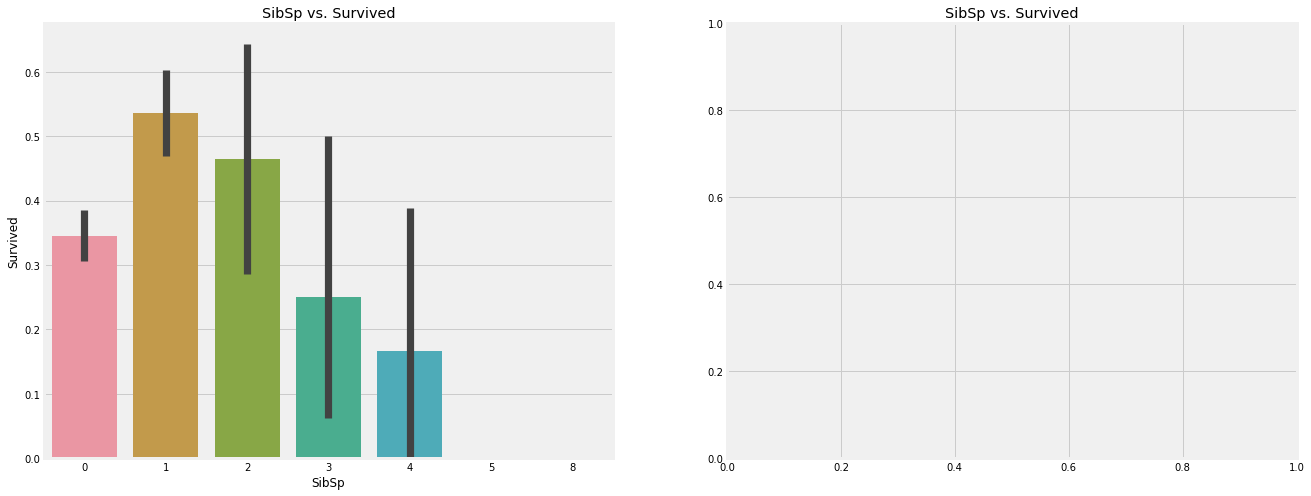

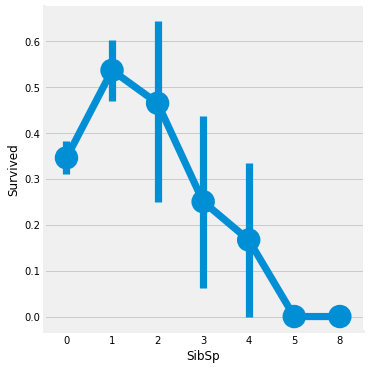

In [36]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

# plt.close(2)
plt.show()

-> `factorplot`Ïù¥ subplotÏúºÎ°ú Í∑∏Î†§ÏßÄÏßÄ ÏïäÎäîÎã§ !!!!! <br/>
-> Ïù¥ ÎåÄÏã† `pointpolot`ÏúºÎ°ú Î∞îÍæ∏Î©¥ Î¨∏Ï†ú Ìï¥Í≤∞
- factorplotÏùÄ figure-levelÏù¥Îùº ÏûêÍ∏∞Í∞Ä figureÎ•º ÏÉàÎ°ú ÌïòÎÇò ÎßåÎìúÎäîÎç∞, ÎòëÍ∞ôÏù¥ ÏÉùÍ∏¥ pointplotÏùÄ axes-levelÏù¥Îùº Í∏∞Ï°¥Ïùò axesÏóê Îã¥Í∏∞ ÎïåÎ¨∏Ïóê Î¨∏Ï†úÍ∞Ä ÏóÜÎã§. <br/>

[Ï∂úÏ≤ò Î∏îÎ°úÍ∑∏](https://blog.naver.com/PostView.naver?blogId=fbfbf1&logNo=222458265191&parentCategoryNo=37&categoryNo=54&viewDate=&isShowPopularPosts=false&from=postView)

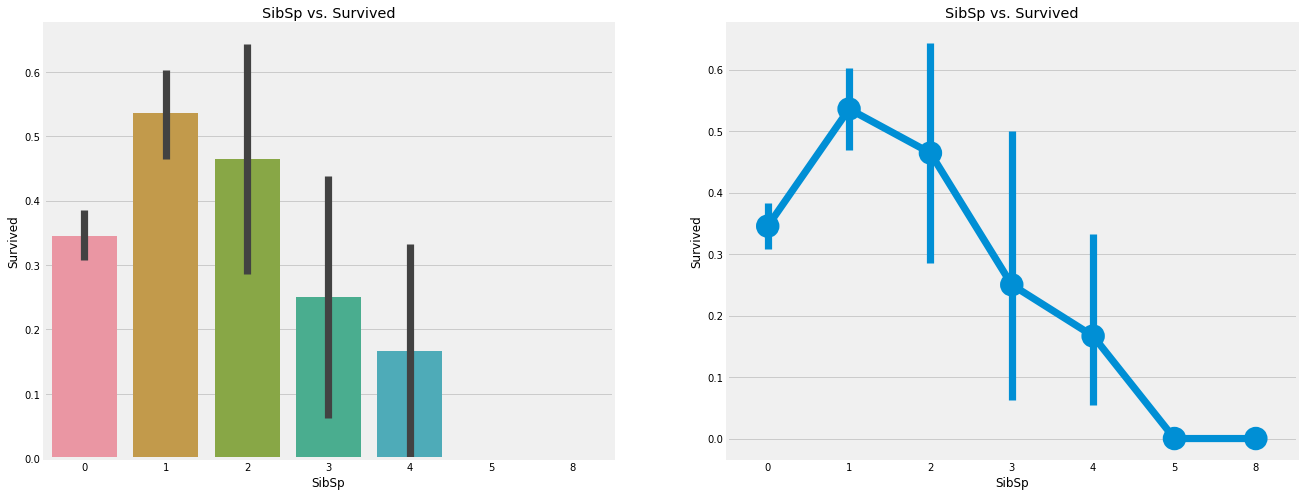

In [37]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

plt.close(2)
plt.show()

- SibSpÍ∞Ä ÏóÜÎäî ÏÇ¨ÎûåÏùò ÏÉùÏ°¥Î•†ÏùÄ ÏïΩ 34.5%Ïù¥Í≥†, SibSpÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ Ï§ÑÏñ¥Îì†Îã§.
- ÎãπÏó∞Ìï† Í≤ÉÏù¥, ÎÇ¥Í≤å ÌòïÏ†úÏûêÎß§Í∞Ä ÏûàÎã§Î©¥ Í∑∏Îì§Î∂ÄÌÑ∞ saveÌïòÍ≤å Ìï† Í≤ÉÏù¥Îã§.
- ÎÜÄÎûçÍ≤åÎèÑ Í∞ÄÏ°± ÏàòÍ∞Ä 5-8Î™Ö ÏÇ¨Ïù¥Îäî 0%Ïù∏Îç∞, Í∑∏ Ïù¥Ïú†Îäî PclassÏù¥ÎùºÍ≥† ÌåêÎã®ÎêúÎã§.

In [38]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')


-ÏúÑ ÌëúÏóê Îî∞Î•¥Î©¥ SibSpÍ∞Ä 4Î™Ö Ïù¥ÏÉÅÏù∏ ÏÇ¨ÎûåÏùÄ Î™®Îëê Pclass 3Ïóê Ï°¥Ïû¨ÌïúÎã§. Ïù¥Îäî Pclass3Ïóê ÌÉÑ large familyÍ∞Ä Ï£ΩÏóàÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïù∏Îã§.

### Parch
: number of parents/children

In [39]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

> ÏúÑ crosstabÏóêÏÑúÎèÑ Pclass 3Ïóê large familyÍ∞Ä ÌÉîÏùåÏùÑ Î≥¥Ïù∏Îã§.

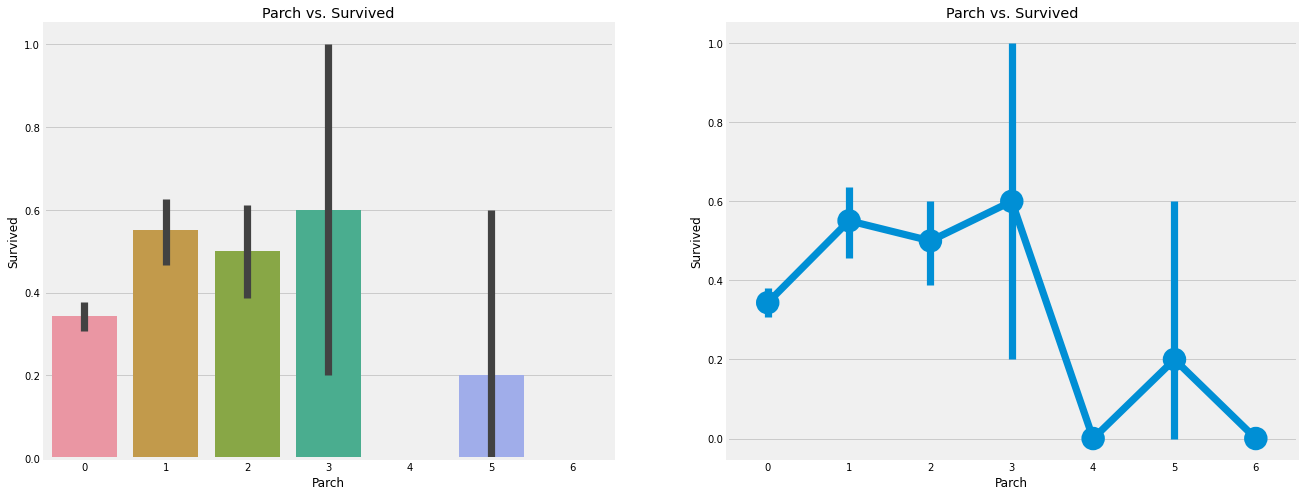

In [40]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs. Survived')

sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')

plt.close(2)
plt.show()

> - ParentsÍ∞Ä ÏûàÎäî ÌÉëÏäπÍ∞ùÎì§Ïùò ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏßÄÎßå Í∑∏ ÏàòÍ∞Ä Îäò Í≤ΩÏö∞ ÏÉùÏ°¥Î•†ÏùÄ Ï§ÑÏñ¥Îì†Îã§.
> - 1-3Î™ÖÏùò Î∂ÄÎ™®Î•º Í∞ÄÏßÑ Í≤ΩÏö∞ Í∞ÄÏû• ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÍ≥†, 4Î™Ö Ïù¥ÏÉÅÏù¥ ÎêòÎ©¥ Í∞êÏÜåÌïúÎã§.

### Fare (Continous)

In [41]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


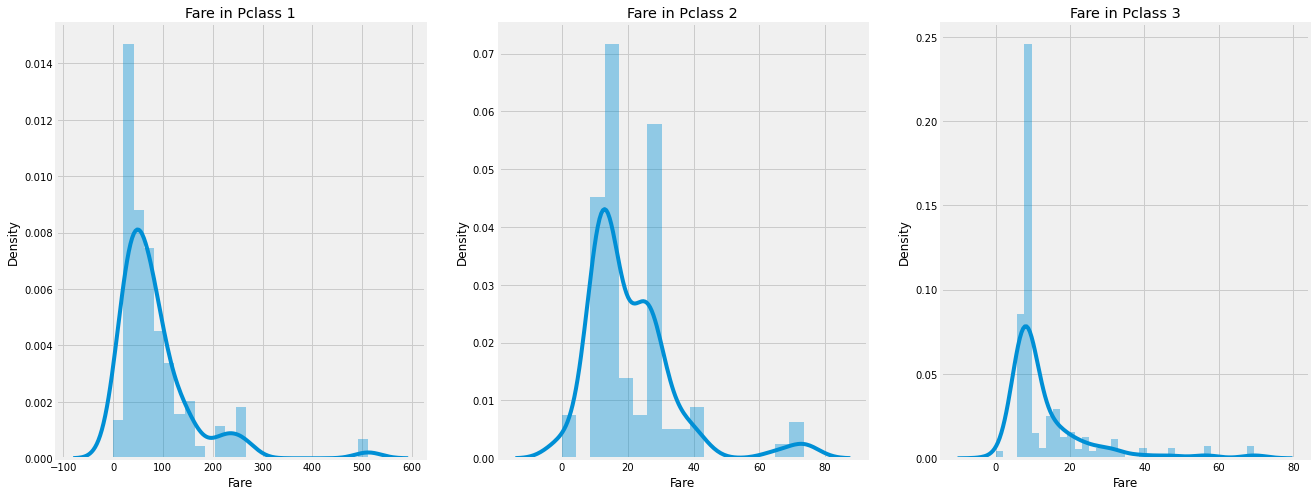

In [42]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

> Pclass 1Ïùò Í≤ΩÏö∞ Î∂ÑÌè¨Í∞Ä Í∞ÄÏû• ÌÅ¨Í≥†, Î≥¥ÌÜµ FareÍ∞Ä ÎäòÏàòÎ°ù Í∑∏ ÎπàÎèÑÏàòÍ∞Ä Ï§ÑÏñ¥Îì†Îã§.
> - continous featureÏù¥ÎØÄÎ°ú binningÏùÑ ÌÜµÌï¥ discrete valuesÎ°ú Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÎã§.

## - Observations in a Nutshell for all features
- **Sex**: Ïó¨ÏûêÏùò ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏùå

- **Pclass**: 1st class Ïùò ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÍ≥†, 3rd classÏùò ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùå. Ïó¨ÏûêÏùò Í≤ΩÏö∞, 1st, 2nd class ÏÉùÏ°¥Î•†Ïù¥ Í±∞Ïùò 1Ïù¥Îã§.

- **Age**: 5-10ÏÑ∏ ÏÇ¨Ïù¥Ïùò ÏïÑÏù¥Îì§ÏóêÏÑú ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÍ≥†, 15-35ÏÑ∏ ÌÉëÏäπÍ∞ùÏùò ÏÇ¨ÎßùÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÎã§.

- **Embarked**: C ÌÉëÏäπÍµ¨Ïùò ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÍ≥†, Q Ìï≠Íµ¨Îäî Í±∞Ïùò Ï†ÑÎ∂ÄÍ∞Ä Pclass3Ïùò ÏÇ¨ÎûåÏù¥ÎùºÍ≥† ÌåêÎã®ÎêúÎã§.

- **Parch + SibSp** : 1-2Î™ÖÏùò ÌòïÏ†ú, 1-3Î™ÖÏùò Î∂ÄÎ™®Î•º Í∞ÄÏ°åÏùÑ Îïå ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.

## Correlation between the Features
- `annot=True`: Ïà´Ïûê Ï†ÅÍ∏∞

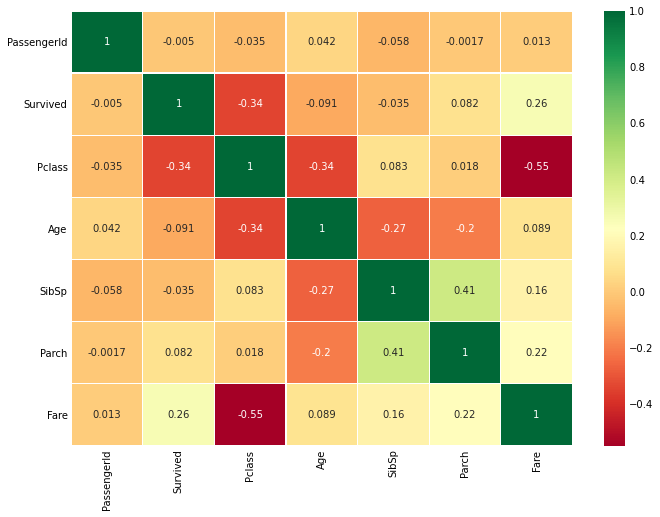

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Interpreting teh Heatmap
Ïö∞Î¶∞ Ïò§ÏßÅ 'numeric features'Îßå ÎπÑÍµêÌï† Ïàò ÏûàÎã§ !! <br/>
- Îëê featureÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞íÏù¥ Îß§Ïö∞ ÎÜíÎã§Î©¥, Ïù¥Îäî ÏÑúÎ°úÏÑúÎ°ú ÏòÅÌñ•ÏùÑ ÎßéÏù¥ ÎØ∏ÏπúÎã§Îäî ÎìØ, Ï¶â Í∑∏ Ï§ë ÌïòÎÇòÎäî ÌïÑÏöîÌïòÏßÄ ÏïäÎã§Îäî Îú®ÏãúÎã§.

ÏúÑ heatmapÏùÑ Î≥¥Î©¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í∑∏Î¶¨ ÎÜíÏßÄ ÏïäÍ≥†, **SibSp**ÏôÄ **Parch**Í∞Ä 0.41Î°ú Ï†úÏùº ÎÜíÎã§.

***

## 2. Feature Enginnering adn Data Cleansing
- redundantÌïú featureÏùÄ Ï†úÍ±∞ÌïòÍ≥†, ÏÉàÎ°úÏö¥ featureÏùÑ Ï∂îÍ∞ÄÌïòÎäî Í≥ºÏ†ï

### Age_band
- problem: continous
> BinningÏù¥ÎÇò NormalizationÏùÑ ÌÜµÌï¥ categorical valuesÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÏûê.

In [44]:
data['Age'].max(), data['Age'].min(), data['Age'].mean()

(80.0, 0.42, 29.841941638608304)

> ÏµúÎåÄ ÎÇòÏù¥Îäî 80ÏÑ∏Ïù¥ÎØÄÎ°ú, Ï¥ù 5Í∞úÏùò binsÏúºÎ°ú ÎÇòÎà†Ï£ºÏûê. <br/>
-> Ìïú binsÎãπ ÌÅ¨Í∏∞Îäî 16Ïùº Í≤É

In [45]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked Initial  Age_band  
0      0  A/5 21171   7.2500   NaN        S      Mr         1  
1      0   PC 17599  71.2833   C85        C     Mrs         2

In [46]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

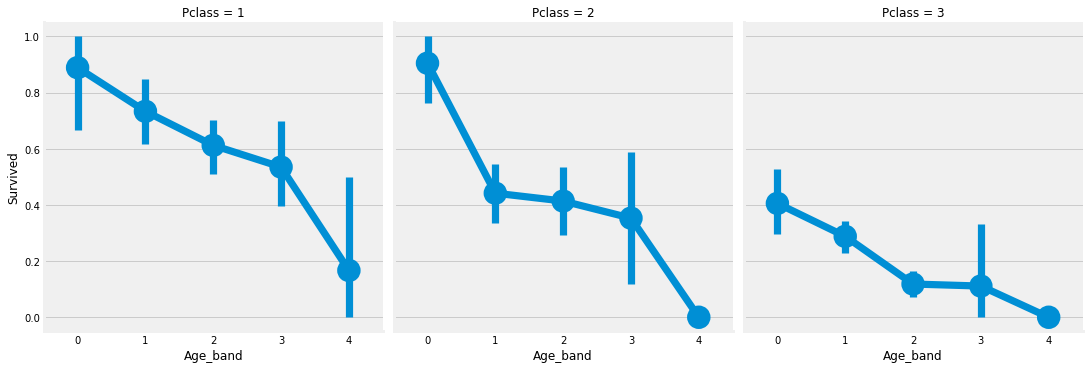

In [47]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

> ÎÇòÏù¥Í∞Ä Îì§ÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ ÎÇÆÏïÑÏßÑÎã§.

### Family_Size and Alone
- ÏÉàÎ°úÏö¥ featureÏù∏ Family_SizeÏôÄ Alone ÎßåÎì§Ïñ¥ Î∂ÑÏÑùÌïòÍ∏∞
- Ïù¥Îäî 'Parch'ÏôÄ 'SibSp'Ïùò summationÏù¥Îã§.

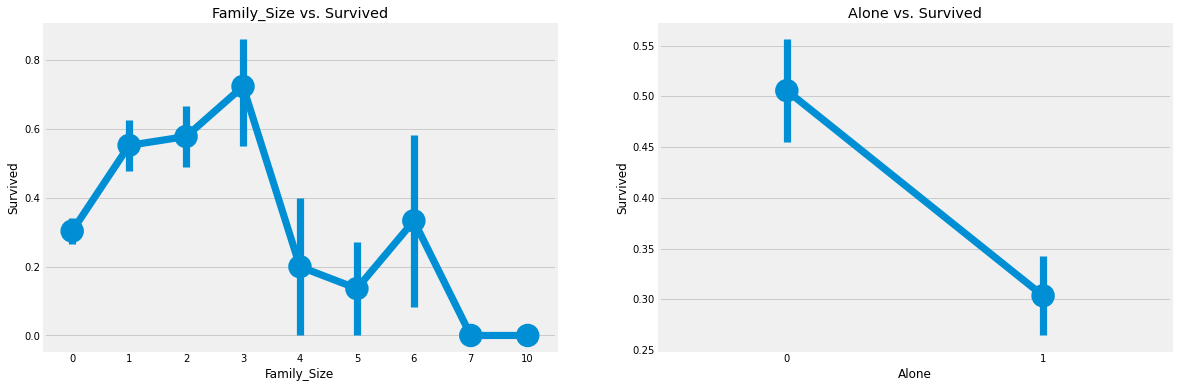

In [48]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # Alone

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs. Survived')

sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')

plt.close(2)
plt.close(3)
plt.show()

> ‚ùì `plt.close(2)`, `plot.close(3)`Ïùò ÏùòÎØ∏?

> - Family_Size=0Ïù¥ Î∞îÎ°ú Alone=1Ïù¥ÎùºÎäî ÏùòÎØ∏Ïù¥Îã§. Í∑∏ÎûòÌîÑÎ•º Î≥¥ÎçîÎùºÎèÑ Family_SizeÍ∞Ä 0Ïù¥Í±∞ÎÇò AloneÏùº Í≤ΩÏö∞ ÏÉùÏ°¥Î•†ÏùÄ Îß§Ïö∞ ÎÇÆÎã§.
> - Family_Size > 4Ïùº Í≤ΩÏö∞ÏóêÎèÑ ÏÉùÏ°¥Î•≠Ïù¥ Í∞êÏÜåÌïúÎã§.
> - Ïù¥Îäî Í∞ÄÏ°± ÏàòÍ∞Ä Î™®Îç∏ÏóêÏÑú Ï§ëÏöîÌïú featureÏûÑÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.

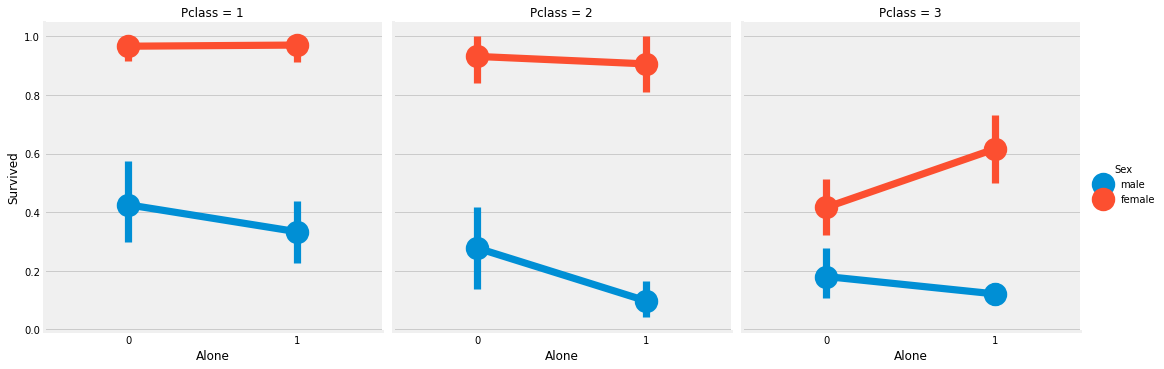

In [49]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

> Pclass3Ïùò Ïó¨ÏûêÎ•º Î≥¥Î©¥ ÌòºÏûê ÏûàÏùÑ Îïå ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§. Ïù¥Î•º Ï†úÏô∏ÌïòÎ©¥ Î™®Îëê ÌòºÏûêÏù¥ÏßÄ ÏïäÏùÑ ÎïåÍ∞Ä ÎÜíÎã§.

### Fare Range
**`pandas.qcut`**ÏùÑ ÏÇ¨Ïö©ÌïòÏûê
- ÏúÑÏóêÏÑú ÎÇòÏù¥Î•º 5 binsÎ°ú ÎÇòÎàÑÏóàÏúºÎãà, Ïó¨Í∏∞ÏÑúÎèÑ 5Îã®Í≥ÑÎ°ú ÎÇòÎàÑÏûê.

In [50]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

> FareÍ∞Ä Ïò¨ÎùºÍ∞àÏàòÎ°ù ÏÉùÏ°¥Î•†ÎèÑ ÎÜíÏïÑÏßÑÎã§.
> - Ïö∞Î¶¨Îäî Ïù¥Î•º Age_BandÏ≤òÎüº singleton valueÎ°ú Î∞îÍøÄ Í≤ÉÏù¥Îã§.

In [51]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454),'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31),'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513),'Fare_cat'] = 3

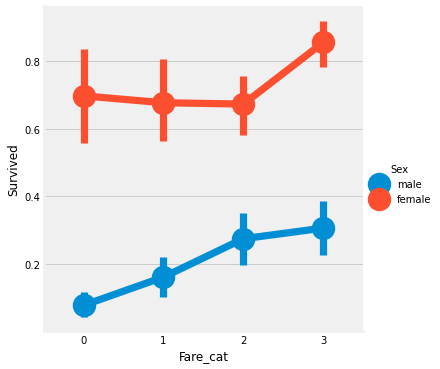

In [52]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

> ÎÇ®ÏûêÏôÄ Ïó¨Ïûê Î™®Îëê FareÏù¥ Ïò§Î•ºÏàòÎ°ù SurvivalÎèÑ Ïò§Î•∏Îã§. (Ïó¨ÏûêÎäî Ï¢Ä ÏïÑÎãåÎìØ?!)

### Converting String Values into Numeric
String(Sex, Embarked, etc...) Î≥ÄÏàòÎ•º Numeric Î≥ÄÏàòÎ°ú Î∞îÍøîÏ£ºÏûê

In [53]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

#### Dropping UnNeeded Features
**Name** -> x need <br/>
**Age** -> we have Age_band <br/>
**Ticket** -> random string <br/>
**Fare** -> we have Fare_cat <br/>
**Cabin** -> a lot on NaN <br/>
**Fare_Range** -> we have Fare_cat <br/>
**PassengerId** -> x categorized

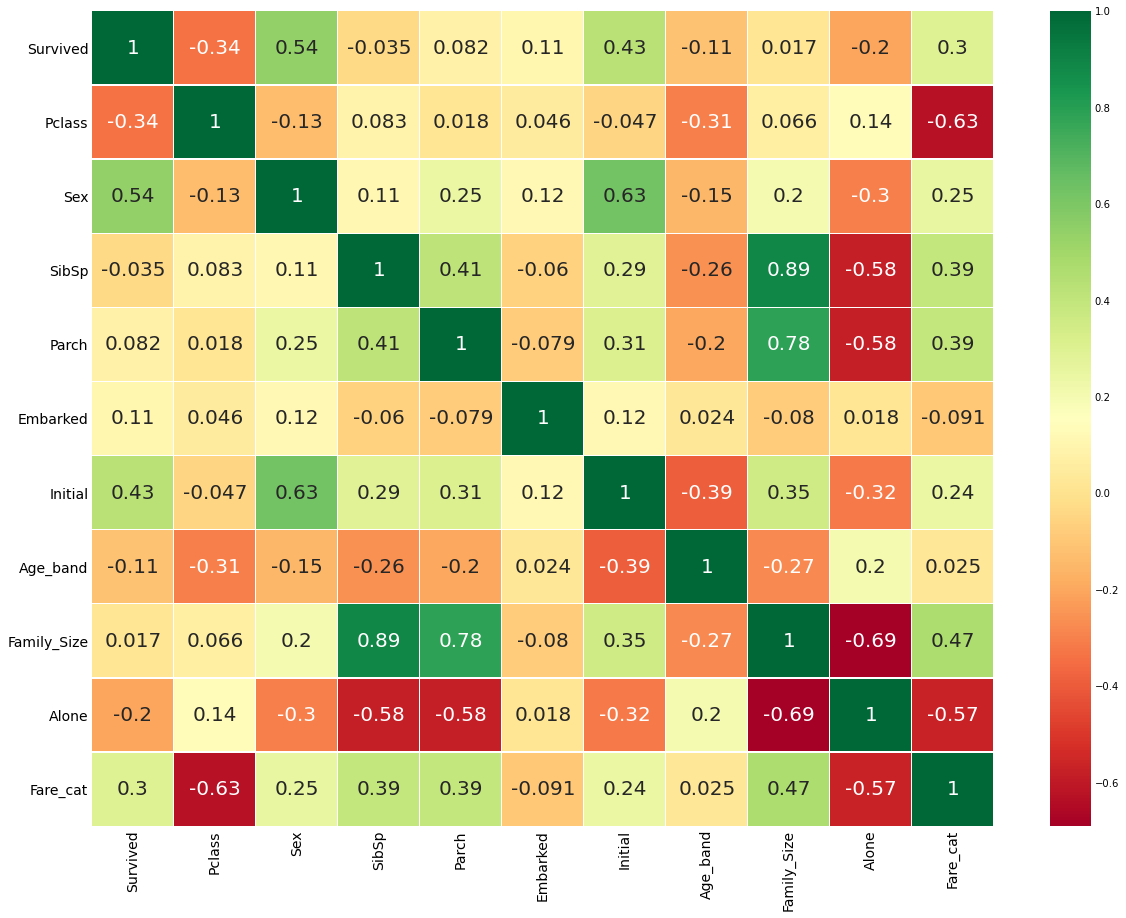

In [54]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf() # ÌòÑÏû¨ figure Í∞ùÏ≤¥ Íµ¨ÌïòÍ∏∞
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

SibSp & Family_Size, Parch & Family_SizeÎäî ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä, Alone & Family_Size, Fare_cat & PclassÎäî ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§. (Îß§Ïö∞ Í∑∏Îü¥ÎìØ Ìï¥Î≥¥ÏûÑ)

***
## 3. Predictive Modeling

Ïó¨Îü¨ Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ïù¥Ïö©Ìï¥ passengerÍ∞Ä surviveÌï†ÏßÄ ÏïÑÎãêÏßÄ ÏòàÏ∏°Ìï† Í≤ÉÏù¥Îã§.

1. Logistic Regression
2. Support Vector Machines (Linear or radial)
3. Random Forest
4. K-Nearest Neighbors
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [55]:
# Import all the required ML plcakges
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [56]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
y = data['Survived']

> `stratify`: Î∂ÑÎ•ò Î¨∏Ï†úÎ•º Îã§Î£∞ Îïå target Í∞íÏùÑ ÏßÄÏ†ïÌï¥Ï§åÏúºÎ°úÏç® `targetÏùò class ÎπÑÏú®ÏùÑ Ïú†ÏßÄ` Ìïú Ï±ÑÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ splitÌï®
> - [Ï∞∏Ï°∞](https://dacon.io/competitions/open/235698/talkboard/404894?page=1&dtype=recent)

### Radial Support Vector Machines (rbf-SVM)

In [57]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accuracy for rbf-SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf-SVM is  0.835820895522388


**SVM**
- Î∂ÑÎ•òÏóê ÏÇ¨Ïö©ÎêòÎäî ÏßÄÎèÑÌïôÏäµ Î®∏Ïã†Îü¨Îãù Î™®Îç∏
- ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞(Support Vector)Î•º ÏÇ¨Ïö©Ìï¥ Í≤∞Ï†ï Í≤ΩÍ≥Ñ(Decision Boundary)Î•º Ï†ïÏùòÌïòÍ≥†, Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ Ï†êÏùÑ 'Í≤∞Ï†ï Í≤ΩÍ≥ÑÏôÄ ÎπÑÍµê'Ìï¥ Î∂ÑÎ•òÌïòÍ≤å Îê®
- Í≥†Ï∞®Ïõê or Î¨¥Ìïú Ï∞®ÏõêÏùò Í≥µÍ∞ÑÏóêÏÑú Ï¥àÌèâÎ©¥(Ïùò ÏßëÌï©)ÏùÑ Ï∞æÏïÑ Ïù¥Î•º Ïù¥Ïö©Ìï¥ Î∂ÑÎ•ò/ÌöåÍ∑ÄÎ•º ÏßÑÌñâ

**Ïª§ÎÑê**
- Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎπÑÏÑ†ÌòïÏÑ± ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥ ÏÑ†Ìòï Î™®Îç∏ÏùÑ Îçî Í∞ïÎ†•ÌïòÍ≤å ÎßåÎì§ Ïàò ÏûàÏùå
- Ïª§ÎÑê Í∏∞Î≤ï: ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ ÎßåÎì§ÏßÄ ÏïäÍ≥†, Í≥†Ï∞®Ïõê Î∂ÑÎ•òÍ∏∞Î•º ÌïôÏäµÏãúÌÇ¨ Ïàò ÏûàÎèÑÎ°ù Ìï®
- Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Í≥†Ï∞®Ïõê ÌäπÏßï Í≥µÍ∞ÑÏúºÎ°ú ÏÇ¨ÏÉÅÌï¥, ÏõêÎûòÏùò Ï∞®ÏõêÏóêÏÑú Î≥¥Ïù¥ÏßÄ ÏïäÎçò ÏÑ†Ìòï(Ï¥àÌèâÎ©¥)Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•òÌï† Ïàò ÏûàÎèÑÎ°ù Ìï®
- ex) Í∞ÄÏö∞ÏãúÏïà Ïª§ÎÑê, RBF(Radial Basis Function) Ïª§ÎÑê

**SVMÏùò ÌäúÎãù**
- gammaÎ≥ÄÏàòÏôÄ CÎ≥ÄÏàòÎ•º Ï°∞Ï†àÌï¥ ÌäúÎãùÏù¥ Ïù¥Î£®Ïñ¥Ïßê
- gamma: ÌïòÎÇòÏùò ÌõàÎ†® ÏÉòÌîåÏù¥ ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïùò Î≤îÏúÑ Í≤∞Ï†ï
- C: Í∞Å Ìè¨Ïù∏Ìä∏Ïùò Ï§ëÏöîÎèÑÎ•º Ï†úÌïúÌïòÎäî Îß§Í∞úÎ≥ÄÏàòÎ°ú, Ìï¥Îãπ Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê Ï†ïÌôïÌïòÍ≤å ÎßûÏ∂∞Ïßê

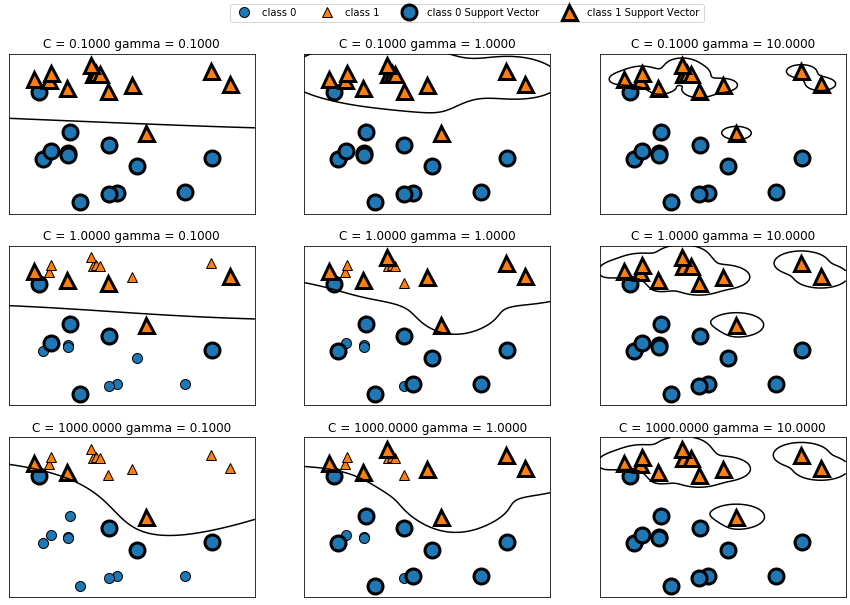

(Ï∂úÏ≤ò: https://inuplace.tistory.com/600)

### Linear Support Vector Machine (linear-SVM)

In [58]:
model = svm.SVC(kernel='linear', C=0.01, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)

print('Accuracy for linear-SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear-SVM is  0.8208955223880597


- linearÎ≥¥Îã® rbf Ïª§ÎÑêÏù¥ Ï†ïÌôïÏÑ± Îçî Ï¢ãÏùå!

### Logistic Regression
: Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥Îñ§ Î≤îÏ£ºÏóê ÏÜçÌï† ÌôïÎ•†ÏùÑ 0-1Ïùò Í∞íÏúºÎ°ú ÏòàÏ∏°ÌïòÍ≥†, Í∑∏ ÌôïÎ•†Ïóê Îî∞Îùº Í∞ÄÎä•ÏÑ±Ïù¥ Îçî ÎÜíÏùÄ Î≤îÏ£ºÏóê ÏÜçÌïòÎäî Í≤ÉÏúºÎ°ú Î∂ÑÎ•òÌï¥Ï£ºÎäî ÏßÄÎèÑ ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò

In [59]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)

print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8134328358208955


### Decision Tree

In [60]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)

print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8022388059701493


### K-Nearest Neighbours(KNN)
- ÎπÑÏä∑Ìïú ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Îäî ÎπÑÏä∑Ìïú Î≤îÏ£ºÏóê ÏÜçÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.
- Ï£ºÎ≥ÄÏóê `Í∞ÄÏû• Í∞ÄÍπåÏö¥ KÍ∞ú`Ïùò Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÜçÌï† Í∑∏Î£πÏùÑ ÌåêÎã®ÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò
- kÎäî ÌôÄÏàòÎ°ú ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏúºÎ©∞, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ï¥ù Îç∞Ïù¥ÌÑ∞ ÏàòÏùò Ï†úÍ≥±Í∑º Í∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [61]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)

print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.832089552238806


- KNNÏóêÏÑú Í∞í(n_neighbours)Îì§ÏùÑ Î∞îÍæ∏Î©¥ÏÑú Ï†ïÌôïÏÑ±ÏùÑ ÌåêÎ≥ÑÌï¥Î≥¥Ïûê.
    - default: 5

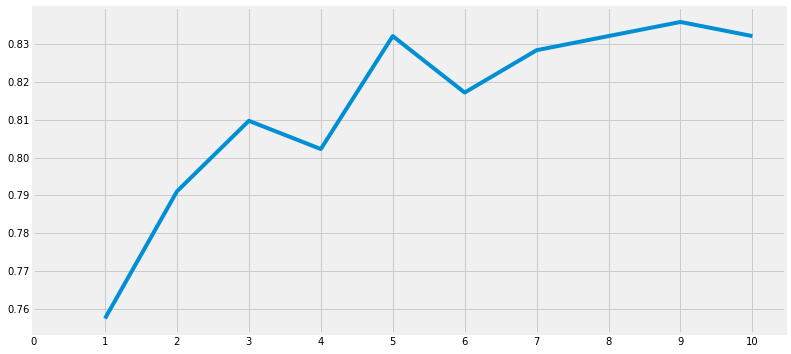

Accuracy for different values of n are:  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max values ad  0.835820895522388


In [62]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf() # ÌòÑÏû¨ figure Í∞ùÏ≤¥ Íµ¨ÌïòÍ∏∞
fig.set_size_inches(12, 6)
plt.show()
print('Accuracy for different values of n are: ', a.values, 'with the max values ad ', a.values.max())

### Gaussian Naive Bayes
**ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à** <br/>
: ÌôïÎ•† Í∏∞Î∞ò Î®∏Ïã†Îü¨Îãù Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶ò
- Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÏù¥Î∏å(Îã®Ïàú)ÌïòÍ≤å Î™®Îì† ÏÇ¨Í±¥ÏùÑ `ÎèÖÎ¶ΩÏ†ÅÏù∏ ÏÇ¨Í±¥`ÏúºÎ°ú Í∞ÄÏ†ïÌïòÍ≥†, Ïù¥ ÎèÖÎ¶Ω ÏÇ¨Í±¥Îì§ÏùÑ Î≤†Ïù¥Ï¶à Ïù¥Î°†Ïóê ÎåÄÏûÖÏãúÏºú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò Î†àÏù¥Î∏îÎ°ú Î∂ÑÎ•òÎ•º Ïã§ÌñâÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò
- Î≤†Ïù¥Ï¶à Ïù¥Î°†: $P(A|B) = {P(B|A) P(A)} / {P(B)}$


- ÏÑ§Î™Ö Î≥ÄÏàòÍ∞Ä Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùº Îïå: Í∞ÄÏö∞ÏãúÏïà ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à
- ÏÑ§Î™Ö Î≥ÄÏàòÍ∞Ä Î≤îÏ£ºÌòï Î≥ÄÏàòÏùº Îïå: Îã§Ìï≠ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à <br/>
(Î≤îÏ£ºÍ∞Ä 2Í∞úÎ∞ñÏóê ÏóÜÎäî Ïù¥ÏßÑÌòïÏùº Îïå: Î≤†Î•¥ÎàÑÏù¥ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à)

<br/>

**Í∞ÄÏö∞ÏãúÏïà ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à** <br/>
: ÌëúÎ≥∏ ÌèâÍ∑†Í≥º ÌëúÎ≥∏ Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏßÑ Ï†ïÍ∑úÎ∂ÑÌè¨ ÌïòÏóêÏÑú Î≤†Ïù¥Ï¶à Ï†ïÎ¶¨Î•º ÏÇ¨Ïö©Ìïú Í≤É <br/>
- Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∞ÄÏßÑ ÌëúÎ≥∏Îì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú `Ï°∞Í±¥Î∂Ä ÎèÖÎ¶Ω`ÏùÑ ÎÇòÌÉÄÎÇ¥, Ìï≠ÏÉÅ Í∞ôÏùÄ Î∂ÑÎ™®Î•º Í∞ñÎäî Ï°∞Í±¥ ÌïòÏóê Î∂ÑÏûêÏùò Í∞íÏù¥ Í∞íÏù¥ ÌÅ∞ Í≤ΩÏö∞ (ÌôïÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Í≤ΩÏö∞)Î•º 'ÏÑ†ÌÉù'ÌïòÎäî Í≤É

In [63]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)

print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests

In [64]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)

print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8246268656716418


Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä Î∂ÑÎ•ò Î™®Îç∏Ïùò 'Í∞ïÍ±¥Ìï®'ÏùÑ Ï¢åÏö∞ÌïòÎäî only ÏöîÏù∏Ïù¥ Îê† Ïàò ÏóÜÎã§.
- ÎßåÏïΩ Î∂ÑÎ•òÍ∏∞Í∞Ä ÌïôÏäµÎêòÏñ¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ïÌôïÎèÑÍ∞Ä 90%ÎùºÍ≥† Ìï¥Î≥¥Ïûê.
- Ï†ïÌôïÎèÑÍ∞Ä Îß§Ïö∞ Ï¢ãÏïÑÎ≥¥Ïù¥ÏßÄÎßå Í≥ºÏó∞ Î™®Îì† ÏÉàÎ°úÏö¥ test setÏóê ÎåÄÌï¥ Ìï≠ÏÉÅ 90%Í∞Ä ÎÑòÍ≤å ÎÇòÏò¨Íπå?
- The answer is no. ÏôúÎÉêÎ©¥ Î∂ÑÎ•òÍ∏∞Îäî ÏûêÍ∏∞ ÏûêÏã†ÏùÑ trainÏúºÎ°ú Ïì∏ Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§.
- trainÍ≥º test dataÍ∞Ä Í≥ÑÏÜçÌï¥ÏÑú Î∞îÎÄåÎ©¥ÏÑú Ï†ïÌôïÎèÑÎèÑ Î∞îÎÄî Í≤ÉÏù¥Îã§.
- **model variance** -> generalized modelÏù∏ **Cross Validation** ÏÇ¨Ïö©ÌïòÍ∏∞

Ï¶â, Í≥†Ï†ïÎêú test setÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í≤ÄÏ¶ù/ÏàòÌñâÌïòÎäî Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïòÎ©¥, Í≤∞Íµ≠ ÎÇ¥Í∞Ä ÎßåÎì† Î™®Îç∏ÏùÄ test setÏóêÎßå Ïûò ÎèôÏûëÌïòÎäî Î™®Îç∏Ïù¥ Îê† Í≤ÉÏù¥Îã§.
- Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ≥†Ïûê ÌïòÎäî Í≤ÉÏù¥ Î∞îÎ°ú ÍµêÏ∞® Í≤ÄÏ¶ù (Cross Validation)
- train setÏùÑ train set + validation setÏúºÎ°ú Î∂ÑÎ¶¨Ìïú Îí§, validation setÏùÑ ÏÇ¨Ïö©Ìï¥ Í≤ÄÏ¶ùÌïòÎäî Î∞©Ïãù

### Cross Validation
- ÎßåÏïΩ dataÍ∞Ä imbalanceÌïòÎã§Î©¥ Ïö∞Î¶∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ ÌèâÍ∑†ÏùÑ ÎÇ¥ÏÑú ÏÇ¨Ïö©Ìï¥Ïïº Ìï† Í≤ÉÏù¥Îã§.

`K-Fold Cross Validation` <br/>
1. Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ kÍ∞ú(Ìè¥Îìú)Î°ú ÎÇòÎààÏûê.
2. ÎßåÏïΩ k=5ÎùºÍ≥† ÌïòÎ©¥, 1 ÌååÌä∏Î•º testÎ°ú, ÎÇòÎ®∏ÏßÄ 4 ÌååÌä∏Î•º trainÏúºÎ°ú ÎëîÎã§.
3. Îß§ Î∞òÎ≥µÎßàÎã§ Ïù¥ test ÌååÌä∏Î•º Î∞îÍæ∏Î©¥ÏÑú Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïúÎã§. Ï†ïÌôïÎèÑÏôÄ ÏóêÎü¨Îäî ÌèâÍ∑†ÏùÑ ÎÇ∏Îã§.
4. ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÎïåÎïåÎ°ú train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ overfitting or underfittingÏù¥ Îê† Í≤ÉÏù∏Îç∞ Cross validtionÏùÄ Ïù¥Î•º Î∞©ÏßÄÌïúÎã§.

> cross_val_score() ÏàòÌñâ ÌõÑ, Î∞òÌôò Í∞íÏùÄ scoring ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏßÄÏ†ïÎêú Ï∏°Ï†ï Í∞íÏùÑ Î∞∞Ïó¥ ÌòïÌÉúÎ°ú Î∞òÌôòÌï®
> - X: feature Îç∞Ïù¥ÌÑ∞ÏÖã
> - y: label Îç∞Ïù¥ÌÑ∞ ÏÖã
> - cv: ÍµêÏ∞® Í≤ÄÏ¶ù Ìè¥Îìú Ïàò
> - scoring: ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # 10Í∞úÏùò foldÎ°ú ÎÇòÎàî
xyz = [] # ÌèâÍ∑†
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') # Í∞íÏù¥ Ï¥ù 10Í∞úÏî© Ï°¥Ïû¨
    cv_result = cv_result # Why?
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

CV Mean       Std
Linear Svm           0.784607  0.057841
Radial Svm           0.828377  0.057096
Logistic Regression  0.799176  0.040154
SVM                  0.808140  0.040287
Decision Tree        0.804732  0.047106
Naive Bayes          0.795843  0.054861
Random Forest        0.809263  0.042580

<AxesSubplot:>

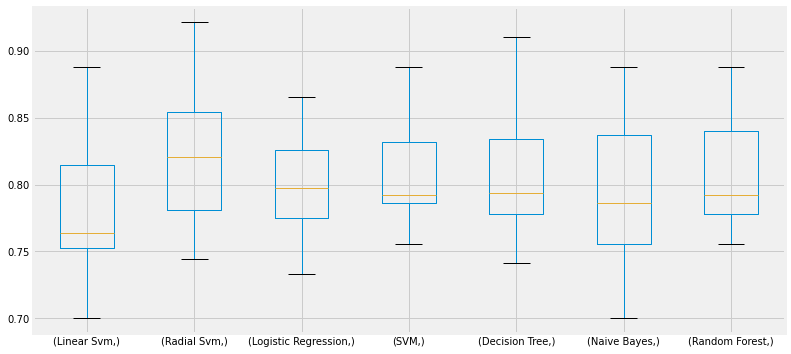

In [66]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

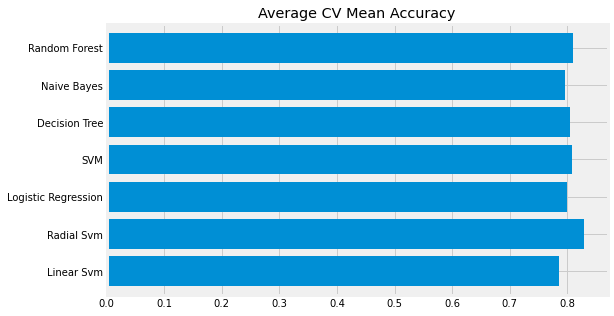

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

- Classification accuracyÎäî ÎïåÎïåÎ°ú imbalanceÎ°ú Ïù∏Ìï¥ Î¨∏Ï†úÎ•º Î≥¥Ïùº Ïàò ÏûàÎã§.
- confusion matrixÎ•º ÌÜµÌï¥ ÏöîÏïΩÎêú Í≤∞Í≥º(Ïñ¥Îñ§ Î™®Îç∏Ïù¥ ÏûòÎ™ª ÎêòÏóàÎäîÏßÄ / ÏûòÎ™ª ÏòàÏ∏° ÌñàÎäîÏßÄ)Î•º ÎÇòÌÉÄÎÇ¥Ïûê.

### Confusion Matrix
- correct / incorrect classificationsÏùò ÏàòÎ•º Ï§ÄÎã§.

> `cross_val_predict`: ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ ÏñªÏùÄ ÏòàÏ∏°

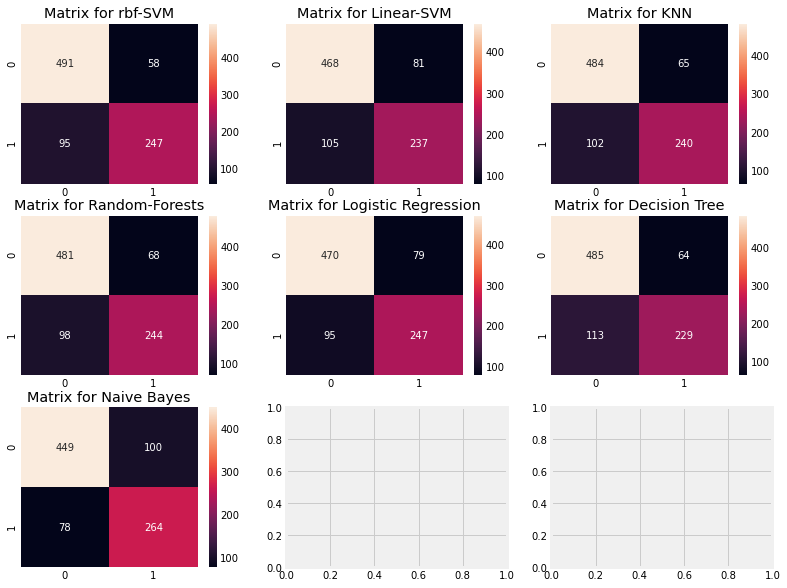

In [68]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

- ÏôºÏ™Ω ÎåÄÍ∞ÅÏÑ†ÏùÄ Ïò¨Î∞îÎ•∏ ÏòàÏ∏°ÏùÑ, Ïò§Î•∏Ï™Ω ÎåÄÍ∞ÅÏÑ†ÏùÄ ÏûòÎ™ªÎêú ÏòàÏ∏°ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.

1. correct predictions: 491(dead)+247(survived) -> (491+247)/891 = 82.8%
2. 58Î™ÖÏùò ÏÇ¥ÏïòÎäîÎç∞ Ï£ΩÏóàÎã§Í≥†, 95Î™ÖÏùò Ï£ΩÏóàÎäîÎç∞ ÏÇ¥ÏïòÎã§Í≥† ÏûòÎ™ª Î∂ÑÎ•òÎêú ÏÇ¨ÎûåÎì§Ïùò Ïàò

- ÏúÑ ÌëúÎ•º Î≥¥Î©¥ rbf-SVMÏù¥ Ï£ΩÏùÄ ÏÇ¨Îûå ÏòàÏ∏°(0, 0)ÏùÑ Í∞ÄÏû• Ïûò ÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.
- Î∞òÎ©¥ Naive BayesÎäî ÏÇ∞ ÏÇ¨Îûå ÏòàÏ∏°(1, 1)ÏùÑ Í∞ÄÏû• Ïûò ÌïúÎã§.

### Hyper-Parameters Tuning
- Î®∏Ïã†Îü¨ÎãùÏùÄ Î∏îÎûôÎ∞ïÏä§Í∞ôÏù¥ Ïó¨Îü¨ default parametersÎäî Ï°¥Ïû¨ÌïòÏßÄÎßå, Îçî Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ tune ÌïòÍ±∞ÎÇò Î∞îÍøÄ Ïàò ÏûàÎã§.
- SVMÏóêÏÑú CÎÇò gammaÍ∞ôÏùÄ Í≤ÉÏùÑ hyper-parametersÎùº Î∂àÎ¶¨Í≥†, learning rateÎ•º Î∞îÍøÄ ÏàòÎèÑ ÏûàÎã§.
- Ïö∞Î¶∞ 2Í∞ÄÏßÄ best classifierÎ•º ÏúÑÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌï† ÌÖêÎç∞, SVMÍ≥º RandomForestsÎ•º Ïù¥Ïö©ÌïòÏûê.
- **GridSearchCV**

> - `estimator`: classifier, regressor, pipeline Îì±
> - `param_grid`: ÌäúÎãùÏùÑ ÏúÑÌï¥ ÌååÎùºÎØ∏ÌÑ∞, ÏÇ¨Ïö©Îê† ÌååÎùºÎØ∏ÌÑ∞Î•º dictionary ÌòïÌÉúÎ°ú ÎßåÎì§Ïñ¥ ÎÑ£Ïùå
> - `scoring`: ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï† ÌèâÍ∞Ä Î∞©Î≤ï, Î≥¥ÌÜµ accuracy ÏßÄÏ†ïÌï¥ Ï†ïÌôïÎèÑ ÌèâÍ∞ÄÌï®
> - `verbose`: ÌÉêÏÉâ Í≥ºÏ†ïÏóêÏÑú Ï∂úÎ†•ÎêòÎäî Î©îÏãúÏßÄÏùò Ïñë Í≤∞Ï†ï (0-3 ÏúºÎ°ú Í∞àÏàòÎ°ù ÏûêÏÑ∏Ìïú Î©îÏãúÏßÄ Ï∂úÎ†•)

### SVM

In [69]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5 ,0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_) # ÏµúÍ≥†Ïùò Ï†êÏàò
print(gd.best_estimator_) # ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï∂úÎ†•

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

In [70]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


> - SVM: C=0.4, gamma=0.1 (82.82%)
> - RandomForest: n_estimators=300, random_state=0 (81.93%)

### Ensembling
- ÏïôÏÉÅÎ∏îÏùÄ Ï†ïÌôïÏÑ±Í≥º ÏÑ±Îä•ÏùÑ ÎÜíÏù¥ÎäîÎç∞ Ï¢ãÏùÄ Î∞©Î≤ï Ï§ë ÌïòÎÇòÏù¥Îã§.
- Ïó¨Îü¨ Î∂ÑÎ•òÍ∏∞Î•º ÏÉùÏÑ±ÌïòÍ≥† Í∑∏ ÏòàÏ∏°ÏùÑ Í≤∞Ìï©Ìï®ÏúºÎ°úÏç® Î≥¥Îã§ Ï†ïÌôïÌïú ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ ÎèÑÏ∂úÌïòÎäî Í∏∞Î≤ï
1. Voting Classifier
2. Bagging
3. Boosting

### Voting Classifier
- Ïó¨Îü¨ Í∞ÑÎã®Ìïú Î®∏Ïã†Îü¨Îãù Î™®Îç∏Îì§ÏùÑ Ìï©ÏπòÎäî Í∞ÄÏû• Îã®ÏàúÌïú Î∞©Î≤ï
- ÏÑúÎ°ú Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Í∞ÄÏßÑ Î∂ÑÎ•òÍ∏∞Î•º Í≤∞Ìï©
- ÌèâÍ∑† predictionÏùÑ Ï§ÄÎã§.

> - `hard voting`: Îã§ÏàòÍ≤∞ ÏõêÏπô. ÏòàÏ∏°Ìïú Í≤∞Í¥èÍ∞íÎì§ Ï§ë Îã§ÏàòÏùò Î∂ÑÎ•òÍ∏∞Í∞Ä ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÏùÑ ÏµúÏ¢Ö Î≥¥ÌåÖ Í≤∞Í¥èÍ∞íÏúºÎ°ú ÏÑ†Ï†ï
> - `soft voting`: Î∂ÑÎ•òÍ∏∞Îì§Ïùò Î†àÏù¥Î∏î Í∞í Í≤∞Ï†ï ÌôïÎ•†ÏùÑ Î™®Îëê ÎçîÌï¥ ÌèâÍ∑†ÏùÑ ÎÇ¥ ÌôïÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Î†àÏù¥Î∏î Í∞íÏùÑ ÏµúÏ¢Ö Î≥¥ÌåÖ Í≤∞Í¥èÍ∞íÏúºÎ°ú ÏÑ†Ï†ï

In [71]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                   voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))

cross = cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoring='accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8246268656716418
The cross validated score is  0.8249188514357053


### Bagging
- ÎπÑÏä∑Ìïú classifierÏùò ÏòàÏ∏°Îì§ÏùÑ ÌèâÍ∑† Ï∑®ÌïòÍ∏∞
- ÌèâÍ∑†ÏùÑ Ï∑®ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î∂ÑÏÇ∞ÏùÑ Ï§ÑÏùº Ïàò ÏûàÎã§.
- VotingÍ≥º Îã§Î•∏Ï†ê: Í∞ÅÍ∞ÅÏùò Î∂ÑÎ•òÍ∏∞Í∞Ä Î™®Îëê Í∞ôÏùÄ Ïú†ÌòïÏùò classifierÎ•º Ïù¥Ïö©ÌïúÎã§.

### Bagged KNN
- BaggingÏùÄ ÎÜíÏùÄ Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏßà Îïå Ïûò ÎèôÏûëÌïúÎã§.
- ex) Decision Tree, RandomForest
- `n_neighbors`Î•º Ïù¥Ïö©Ìï¥ KNNÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

In [72]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                          random_state=0,
                          n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.835820895522388
The cross validated score for bagged KNN is:  0.8160424469413232


### Bagged DecisionTree

In [73]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.8208955223880597
The cross validated score for bagged Decision Tree is:  0.8171410736579275


### Boosting
: Ïó¨Îü¨ Í∞úÏùò Î∂ÑÎ•òÍ∏∞Í∞Ä ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïôÏäµÏùÑ ÏàòÌñâÌïòÎêò, ÏòàÏ∏°Ïù¥ ÌãÄÎ¶∞ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°ÌïòÎèÑÎ°ù Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎ©∞ ÌïôÏäµÍ≥º ÏòàÏ∏° ÏßÑÌñâ
- Ïó¨Îü¨ Í∞úÏùò ÏïΩÌïú ÌïôÏäµÍ∏∞Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïôÏäµ/ÏòàÏ∏°ÏùÑ ÌïòÎ©∞ ÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Ïóê Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï¥ Ïò§Î•òÎ•º Í∞úÏÑ†Ìï¥ÎÇòÍ∞ÄÎäî ÌïôÏäµ Î∞©Ïãù
<br/>

- sequentialÌïú classifierÎì§Ïùò ÏïôÏÉÅÎ∏î Í∏∞Î≤ï
- Ï≤òÏùåÏóî complete datasetÏóê ÎåÄÌï¥ ÌõàÎ†®ÏùÑ Î∞õÍ≥†, ÏùºÎ∂Ä ÌãÄÎ¶∞ ÏòàÏãúÎì§ÏùÑ Í∞ÄÏßà Í≤ÉÏù¥Îã§.
- Í∑∏Îü¨Î©¥ Îã§Ïùå Î≤à Î∞òÎ≥µÏóêÏÑú ÌãÄÎ¶¨Í≤å ÏòàÏÉÅÌïú ÏòàÏãúÎì§Ïóê Îçî Í∞ÄÏ§ëÏπòÎ•º ÎëêÍ≥†, Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°Ìï† Í≤ÉÏù¥Îã§.
- Ïù¥ Í≥ºÏ†ïÏù¥ Î∞òÎ≥µÎêòÎ©¥ÏÑú Ï†ïÌôïÏÑ±Ïù¥ ÏµúÎåÄÌïúÏúºÎ°ú Îäò ÎïåÍπåÏßÄ ÏÉà Î∂ÑÎ•òÍ∏∞Í∞Ä Ïù¥Ïö©Îê† Í≤ÉÏù¥Îã§.

> AdaBoost & GradientBoostÏùò Ï∞®Ïù¥Ï†ê
> - GradientBoost: Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏Î•º **Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï**ÏùÑ Ïù¥Ïö©Ìï¥ ÌïúÎã§.

### AdaBoost (Adaptive Boosting)
- ÏòàÏ∏° ÏÑ±Îä•Ïù¥ Ï°∞Í∏à ÎÇÆÏùÄ weak classifierÎ•º Îã§Îüâ Íµ¨Ï∂ï Î∞è Ï°∞Ìï©Ìï¥ Í∞ÄÏ§ëÏπò ÏàòÏ†ïÏùÑ ÌÜµÌï¥ Ï¢Ä Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î∞úÌúòÌïòÎäî ÌïòÎÇòÏùò strong classifierÎ•º Ìï©ÏÑ±ÌïòÎäî Î∞©Î≤ïÏùò ÏïåÍ≥†Î¶¨Ï¶ò
- ÏïΩÌïú Î∂ÑÎ•òÍ∏∞Ïùò Ïã§ÏàòÎ•º ÌÜµÌï¥ Í∞ÄÏ§ëÏπòÎ•º Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÏàòÏ†ïÌïòÍ≥† Í≤∞Ìï©ÌïòÏó¨ Ï†ïÌôïÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏúºÎ©∞ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê overfitting ÌòÑÏÉÅÏù¥ Ï†ÅÍ≤å Î∞úÏÉùÌï¥ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Ï†ÄÌïòÌïòÏßÄ ÏïäÎäî Ïû•Ï†êÏù¥ ÏûàÎã§.
<br/>

- Ïù¥ Í≤ΩÏö∞ weak learnerÍ∞Ä Î∞îÎ°ú Decision TreeÏù¥Îã§.
- ÌïòÏßÄÎßå Ïö∞Î¶∞ default base_estimatorÎ•º Î≥ÄÍ≤ΩÌï† Í≤ÉÏù¥Îã§.

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249188514357055


### Stochastic Gradient Boosting
- AdaBoostÏôÄ Ïú†ÏÇ¨ÌïòÍ≤å ÎèôÏûëÌïòÏßÄÎßå Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏ Î∞©ÏãùÏù¥ Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(Gradient descent)ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤É

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


### XGBoost
- GBMÏùò ÏÜçÎèÑ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îç∏ ÏÑ±Îä•Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂òÎã§.
- Î≥ëÎ†¨ Ï≤òÎ¶¨ ÏÇ¨Ïö©ÏúºÎ°ú ÏÜçÎèÑÏôÄ Ï†ïÌôïÎèÑÍ∞Ä Îπ†Î•¥Îã§.
- GBMÍ≥º Îã¨Î¶¨ overfitting Î∞©ÏßÄÎ•º ÏúÑÌï¥ Î≥ÄÏàòÏóê regularizedÎ•º ÏÇ¨Ïö©ÌïúÎã§.

In [73]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# ! brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/services).
==> New Formulae
aarch64-elf-binutils                     licensefinder
aarch64-elf-gcc                          lighthouse
abi-compliance-checker                   lilypond
abi-dumper                               lima
abricate                                 linode-cli
acl                                      linux-headers@4.15
actionlint                               linux-headers@5.16
age                                      liqoctl
airspyhf                                 lit
alda                                     litani
alembic                                  llvm@12
alerter                                  locust
all-repos                                ltex-ls
alpscore                                 lua-language-server
amfora                                   luau
ansilove                                 lunzip
apache-pulsar                            ly
apt                


==> Downloading https://ghcr.io/v2/homebrew/core/libomp/manifests/14.0.0
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/blobs/sha256:e66d2009d6d
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Pouring libomp--14.0.0.monterey.bottle.tar.gz
üç∫  /usr/local/Cellar/libomp/14.0.0: 7 files, 1.6MB
==> `brew cleanup` has not been run in the last 30 days, running now...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
Removing: /Users/yeon/Library/Caches/Homebrew/gdbm--1.19... (208.9KB)
Removing: /Users/yeon/Library/Caches/Homebrew/icu4c--69.1... (27.2MB)
Removing: /Users/yeon/Library/Caches/Homebrew/lz4--1.9.3... (244.4KB)
Removing: /Users/yeon/Library/Caches/Homebrew/mitmproxy--6.0.2_2... (7.0MB)
Removing: /Users/

In [76]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

[09:10:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:10:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:11:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:11:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

- AdaBoostÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†ïÌôïÏÑ±ÏùÑ Î≥¥ÏòÄÎã§.
- Hyper-Parameter TuningÏùÑ Ìï¥Î≥¥Î©∞ Ï†ïÌôïÏÑ±ÏùÑ ÎäòÎ†§Î≥¥Ïûê.

### Hyper-Parameter Tuning for AdaBoost

In [77]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


- AdaBoostÏóêÏÑú ÏµúÎåÄ Ï†ïÌôïÎèÑÎäî n_estimators=100, learning_rate=0.1Ïùº Îïå

### Confusion Matrix for the Best Model

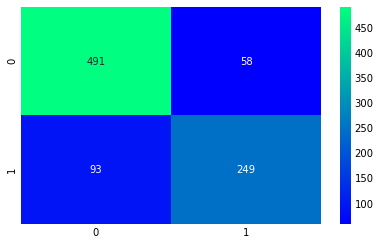

In [78]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

[09:20:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


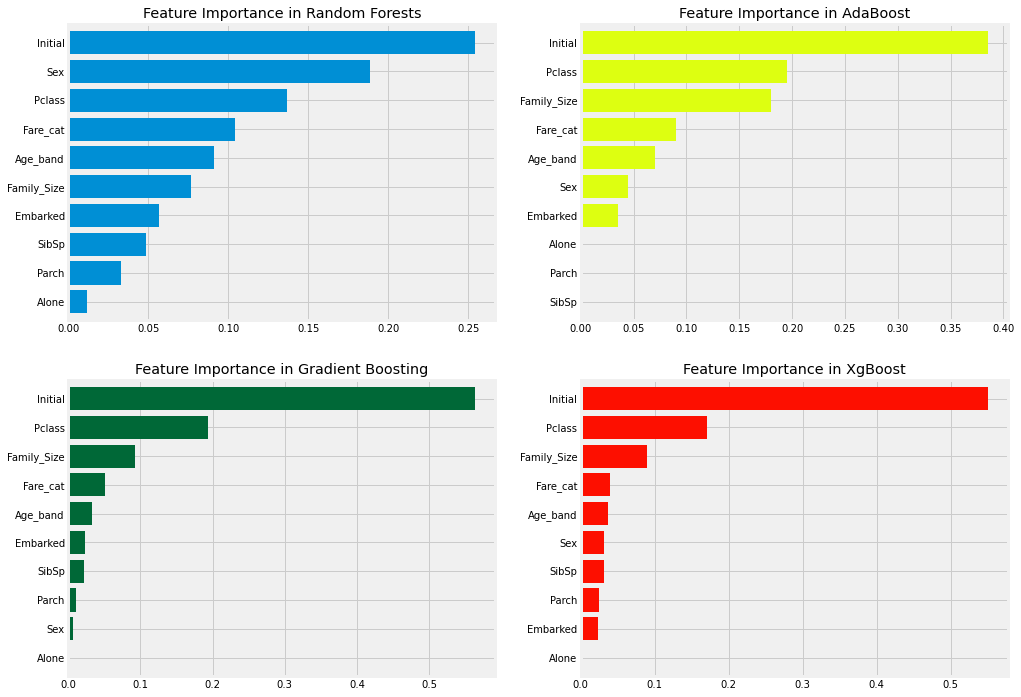

In [82]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators=500, random_state=0) # Why 500?
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show()
